# 最終試験（技能チェック）

# 1.データ準備

講座を通し使用したデータ「av_loan_u6lujuX_CVtuZ9i.csv」を読み込み、特徴量Xと正解ラベルyの設定までの正常終了を確認しましょう。

In [8]:
from IPython.core.display import display
import pandas as pd

# データの読み込み
df = pd.read_csv('./data/av_loan_u6lujuX_CVtuZ9i.csv', header=0)
X = df.iloc[:, 1:-1]
y = df.iloc[:, [-1]]

# 正解ラベルの数値数値変換
class_mapping = {'N':1, 'Y':0}
y = y.copy()
y.loc[:,'Loan_Status'] = y['Loan_Status'].map(class_mapping)

display(X.join(y).head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


- データの特徴量におけるカテゴリ変数は、以下出力がobjectの変数とします。
- データはローン審査が通ったか(0)、通らなかったか(1)の分類タスクのためのデータです。

In [9]:
X.join(y).dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

データ前提となる上記を確認できたら、以下へと進んで下さい。

# 2.最終実技チェック

- 上記で読み込んだデータXとyを対象に、各設問のコードを完成させて下さい。
- コード作成に当たり何を参照しても構いません。
- 回答を終えたら本ファイルを「保存」し、slackのgeneralにアップして下さい。

#### 設問1：正解ラベルyに欠損値がないことを確認せよ。

In [10]:
# write your answer
print('----------------------------------------------------------------------------------------')
print('X shape: (%i,%i)' %X.shape)
print('y shape: (%i,%i)' %y.shape)
print('----------------------------------------------------------------------------------------')
print('****1. y列の値をグループ分け')
print(y.groupby(['Loan_Status']).size())
print('****2. y列に欠損値がなければFalse')
print(y.isnull().any(axis=0))
print('****3. y列の欠損値を数える')
print(y.isnull().sum())

----------------------------------------------------------------------------------------
X shape: (614,11)
y shape: (614,1)
----------------------------------------------------------------------------------------
****1. y列の値をグループ分け
Loan_Status
0    422
1    192
dtype: int64
****2. y列に欠損値がなければFalse
Loan_Status    False
dtype: bool
****3. y列の欠損値を数える
Loan_Status    0
dtype: int64


#### 設問2：特徴量Xをone-hotエンコーディングし、結果をX_oheにセットせよ。

In [11]:
# write your answer
ohe_columns = ['Dependents','Gender','Married','Education','Self_Employed','Property_Area']
X_ohe= pd.get_dummies(X, dummy_na=False, columns=ohe_columns)
display(X_ohe.head())
print('X_ohe shape: (%i,%i)' %X_ohe.shape)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1


X_ohe shape: (614,20)


#### 設問3：X_oheに含まれる欠損値を補完し、X_finの名前でセットしてください。

In [12]:
# write your answer
from sklearn.preprocessing import Imputer

# 欠損値NaNを平均値(mean)で置き換える.処理は列方向で行う
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

# 各特徴量の平均値を学習
imp.fit(X_ohe)

# 学習済みのImputerを適用しX_newの欠損値を置き換える
X_ohe_columns = X_ohe.columns.values
X_fin = pd.DataFrame(imp.transform(X_ohe), columns=X_ohe_columns)

# 結果表示
X_fin.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,146.412162,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


#### 設問4：前処理済み特徴量 X_fin と正解ラベル y を、交叉検証（holdout）のためデータスピリットして下さい。スプリット後の名称は任意で構いません。

In [13]:
# write your answer
from sklearn.model_selection import train_test_split

#　0.8を学習、0.2を検証用でスプリットする
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size=0.2, random_state=1)

#### 設問5：ローン審査の予測モデルとして、以下のパイプラインを構成して下さい。
- 標準化とロジスティック回帰
- 標準化とランダムフォレスト
- 標準化と主成分分析とランダムフォレスト

In [14]:
# write your answer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#標準化＋ロジスティック
pipe_log = Pipeline([('scl',StandardScaler()),('est',LogisticRegression(random_state=1))])
#標準化＋ランダムフォレスト
pipe_rdf = Pipeline([('scl',StandardScaler()),('est',RandomForestClassifier(random_state=1))]) 
#標準化＋PCA＋ランダムフォレスト（PCAは4種類）
pipe_rdfP9 = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=9)),('est', RandomForestClassifier(random_state=1))])
pipe_rdfP11 = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=11)),('est', RandomForestClassifier(random_state=1))])
pipe_rdfP13 = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=13)),('est', RandomForestClassifier(random_state=1))])
pipe_rdfP15 = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=15)),('est', RandomForestClassifier(random_state=1))])


pipe_names = ['Logistic','RandomForest','PCA9_RandomForest','PCA11_RandomForest','PCA13_RandomForest','PCA15 RandomForest']
pipe_lines = [pipe_log, pipe_rdf, pipe_rdfP9, pipe_rdfP11, pipe_rdfP13, pipe_rdfP15]

#### 設問6：設問5で構成したパイプラインの学習と評価を行って下さい。評価指標はf1スコアとすること。

In [15]:
# write your answer
from sklearn.metrics import f1_score

for (i,pipe) in enumerate(pipe_lines):
    
    pipe.fit(X_train, y_train.as_matrix().ravel())
    y_pred=pipe.predict(X_test)
    
    f1_val=f1_score(y_test.as_matrix().ravel(), y_pred)
    print (pipe_names[i]+': %.3f'%f1_val) 

Logistic: 0.571
RandomForest: 0.597
PCA9_RandomForest: 0.333
PCA11_RandomForest: 0.516
PCA13_RandomForest: 0.545
PCA15 RandomForest: 0.500


#### 設問7：ロジスティック回帰のパイプラインについて、以下探索空間のためグリッドサーチで使うパラメータグリッドを設定せよ。
- 正則化：l1またはl2
- 正則化の強さ：0.1, 1.0. 10.0

In [16]:
# write your answer
from sklearn.model_selection import GridSearchCV

param_grid_log = {'est__C':[0.1,1.0,10.0], 'est__penalty':['l1','l2']}
print('探索空間:%s' % param_grid_log)

探索空間:{'est__C': [0.1, 1.0, 10.0], 'est__penalty': ['l1', 'l2']}


#### 設問8：設問7のGridSearchCVを「clf」の名称で設定し学習（fit）せよ。ただし、評価スコアはf1スコアとする。

In [17]:
# write your answer
clf = GridSearchCV(estimator=pipe_log, param_grid=param_grid_log, scoring='f1', cv=3)
clf = clf.fit(X_train, y_train.as_matrix().ravel())
print('Best Score : %.6f\n' % clf.best_score_) 
print('Best Model : %s' % clf.best_estimator_)

Best Score : 0.598959

Best Model : Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


#### 設問9：グリッドサーチで特定されたベストモデルを、検証用データで評価せよ。ただし、評価指標はf1スコアとする。

In [18]:
# write your answer
y_pred=clf.best_estimator_.predict(X_test)
    
f1_val=f1_score(y_test.as_matrix().ravel(), y_pred)
print ('GridSearch： %.3f'%f1_val)

GridSearch： 0.571


#### 設問10：X_finを標準化（Z変換）し、X_fin_stdの名称でセットせよ。

In [19]:
# write your answer
from sklearn.preprocessing import StandardScaler
import numpy as np
scl= StandardScaler()

#標準化が必要な項目のみを抜き出して、fit_transform
X_temp = X_fin.iloc[:, 0:4]
X_temp_col=X_temp.columns.values
X_temp2 = scl.fit_transform(X_temp)

# fit_transformの戻り値は配列なのでDataFrameに変換
X_temp_scl = pd.DataFrame(X_temp2, columns=X_temp_col)

# X_finの残りの列と合体
X_fin_std = pd.concat([X_temp_scl, X_fin.iloc[:, 4:]], axis=1)
display(X_fin_std.head())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,0.000000,0.279851,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.134412,-0.038732,-0.219273,0.279851,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.393747,-0.554487,-0.957641,0.279851,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.462062,0.251980,-0.314547,0.279851,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.097728,-0.554487,-0.064454,0.279851,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


#### 設問11：X_fin_stdを対象にKMeansクラスタリングをした場合のクラスタ数を、2から10としてエルボー図を作成せよ。

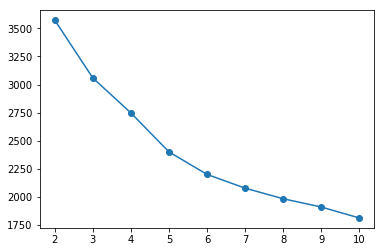

In [20]:
# write your answer
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for i in range(2,11):
    km=KMeans(n_clusters=i, random_state=0).fit(X_fin_std)
    distortions.append(km.inertia_)

plt.plot(range(2,11), distortions, marker='o')

#### 設問12：設問11のエルボー図を読み、どのような判断が妥当か簡潔に述べよ。

【提出後のメモ】
クラスタが2から10では収束せず、さらに増やしても収束は見られない。<br>
そのため、適当なクラスタ数を提示せず、上記のような回答をした。<br>
特徴量を何とか増やして適度なクラスタ数を提示して完了する必要があると考えた。

#### 設問13：クラスタ数を3として、k-meansモデルを構築せよ。

In [21]:
# write your answer
# K-meansによるクラスタリング
X_fin_kmeans = KMeans(n_clusters=3).fit(X_fin_std)

#### 設問14：X_fin_stdの各データサンプルのクラスタ番号を推定し、結果をy_clusに設定せよ。

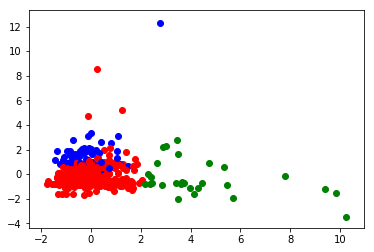

,y_cluster
0,0
1,0
2,0
3,0
4,0


In [22]:
# write your answer
# PCAで次元削減
pca = PCA(n_components=3)
X_fin_pca = pca.fit_transform(X_fin_std)
y_clus_temp=[]

plt.figure()
for (i, label) in enumerate(X_fin_kmeans.labels_):
    y_clus_temp.append(label)
    if label == 0:
        plt.scatter(X_fin_pca[i, 0], X_fin_pca[i, 1], c='red')
    elif label == 1:
        plt.scatter(X_fin_pca[i, 0], X_fin_pca[i, 1], c='blue')        
    elif label == 2:
        plt.scatter(X_fin_pca[i, 0], X_fin_pca[i, 1], c='green')
plt.show()

y_clus=pd.DataFrame(y_clus_temp,columns=['y_cluster'])
display(y_clus.head())    

#### 設問15：y_clusをX_oheに結合し、クラスタ番号別に（特徴量に関する）集計ができるデータセットを作成せよ。

In [23]:
# write your answer
#X_ohe + y_clus でDataFrame作成
X_fin_clus = pd.concat([X_ohe, y_clus], axis=1)
print(X_fin_clus.groupby(['y_cluster']).size())
display(X_fin_clus.head(10))

y_cluster
0    528
1     58
2     28
dtype: int64


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Gender_Female,...,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,y_cluster
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0
3,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
5,5417,4196.0,267.0,360.0,1.0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
6,2333,1516.0,95.0,360.0,1.0,1,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
7,3036,2504.0,158.0,360.0,0.0,0,0,0,1,0,...,0,1,1,0,1,0,0,1,0,0
8,4006,1526.0,168.0,360.0,1.0,0,0,1,0,0,...,0,1,1,0,1,0,0,0,1,0
9,12841,10968.0,349.0,360.0,1.0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,2


【提出後のメモ】
設問はここで終わる。<br>
なぜクラスタを３としてX_oheに結合して終わるのかは不明。<br>
ただしせっかくなので特徴量を追加したと考えて、クラスタ数が収束するか再確認。

In [24]:
# 各特徴量の平均値を学習
imp.fit(X_fin_clus)

# 学習済みのImputerを適用しX_newの欠損値を置き換える
X_fin_clus_columns = X_fin_clus.columns.values
X_fin_clus = pd.DataFrame(imp.transform(X_fin_clus), columns=X_fin_clus_columns)
display(X_fin_clus.head())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Gender_Female,...,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,y_cluster
0,5849.0,0.0,146.412162,360.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,4583.0,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2583.0,2358.0,120.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,6000.0,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


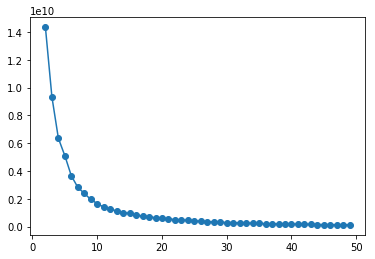

In [22]:
distortions = []
for i in range(2,50):
    km=KMeans(n_clusters=i, random_state=0).fit(X_fin_clus)
    distortions.append(km.inertia_)

plt.plot(range(2,50), distortions, marker='o')

クラスタ数が10の段階以降かなり収束性が高まった。


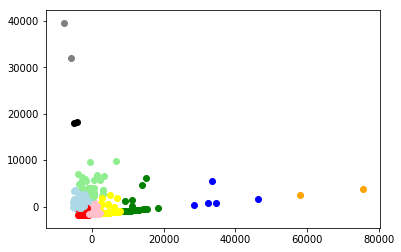

In [26]:
X_fin_kmeans = KMeans(n_clusters=10).fit(X_fin_clus)

pca = PCA(n_components=10)
X_fin_pca = pca.fit_transform(X_fin_clus)
y_clus_temp=[]

plt.figure()
for (i, label) in enumerate(X_fin_kmeans.labels_):
    y_clus_temp.append(label)
    if label == 0:
        plt.scatter(X_fin_pca[i, 0], X_fin_pca[i, 1], c='red')
    elif label == 1:
        plt.scatter(X_fin_pca[i, 0], X_fin_pca[i, 1], c='blue')        
    elif label == 2:
        plt.scatter(X_fin_pca[i, 0], X_fin_pca[i, 1], c='green')
    elif label == 3:
        plt.scatter(X_fin_pca[i, 0], X_fin_pca[i, 1], c='grey')        
    elif label == 4:
        plt.scatter(X_fin_pca[i, 0], X_fin_pca[i, 1], c='yellow')
    elif label == 5:
        plt.scatter(X_fin_pca[i, 0], X_fin_pca[i, 1], c='orange')        
    elif label == 6:
        plt.scatter(X_fin_pca[i, 0], X_fin_pca[i, 1], c='pink')
    elif label == 7:
        plt.scatter(X_fin_pca[i, 0], X_fin_pca[i, 1], c='black')        
    elif label == 8:
        plt.scatter(X_fin_pca[i, 0], X_fin_pca[i, 1], c='lightblue')
    elif label == 9:
        plt.scatter(X_fin_pca[i, 0], X_fin_pca[i, 1], c='lightgreen')        
    elif label == 10:
        plt.scatter(X_fin_pca[i, 0], X_fin_pca[i, 1], c='purple')        
        
plt.show()
   

【提出後メモ】
結果的にy_clusを追加したことで、クラスタ数の収束性は改善された。<br>
ただしそれがこの設問の意図なのかどうか不明。